# Logistic Regression


## Imports


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [9]:
from util import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

NUM_FOLDS = 10


## Reading the data


In [11]:
X, y = get_train_data(path='../data/train.csv')

In [12]:
# standardize the data
X = standardize_features(X)

In [6]:
X.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the model


In scikit-learn, `LogisticRegression` is a class that implements logistic regression for classification tasks. It has several parameters that control its behavior during training and prediction. Here are some of the most commonly used parameters:

1. **penalty**: Specifies the norm used in the penalization. It could be `'l1'` for L1 regularization, `'l2'` for L2 regularization, or `'none'` for no regularization. Default is `'l2'`, `'elasticnet'`: both L1 and L2 penalty terms are added.

2. **C**: Inverse of regularization strength; smaller values specify stronger regularization. Default is `1.0`.

3. **solver**: Algorithm to use in the optimization problem. It could be `'newton-cg'`, `'lbfgs'`, `'liblinear'`, `'sag'`, or `'saga'`. Default is `'lbfgs'`.

4. **max_iter**: Maximum number of iterations taken for the solvers to converge. Default is `100`.

5. **multi_class**: Strategy for handling multiple classes. It could be `'ovr'` (one-vs-rest) or `'multinomial'`. Default is `'ovr'`.

6. **random_state**: Seed used by the random number generator.

7. **tol**: Tolerance for stopping criteria.

8. **verbose**: Controls the verbosity.

9. **class_weight**: Weights associated with classes. Useful for imbalanced datasets.

10. **warm_start**: If set to `True`, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. Default is `False`.

These are some of the main parameters of `LogisticRegression`, but there are more. You can find a comprehensive list in the scikit-learn documentation for `LogisticRegression`.

In [8]:
lr = LogisticRegression(C=100, max_iter=10000)
lr.fit(X_train, y_train)

accuracy:  0.9145625000000001
f1_macro:  0.6703337399977626
f1_micro:  0.9145625000000001


`cross_validate` function in scikit-learn is used for evaluating estimator performance using cross-validation. It takes several parameters to customize its behavior. Here are the main parameters:

1. **estimator**: This is the machine learning estimator (model) that you want to evaluate.

2. **X**: The feature matrix (data) to fit the model on.

3. **y**: The target values (labels) corresponding to X.

4. **cv**: The cross-validation strategy. It could be an integer specifying the number of folds in a KFold, a cross-validation splitter, or an iterable yielding train/test splits.

5. **scoring**: A single string or a callable to evaluate the predictions on the test set. For example, `'accuracy'`, `'precision'`, `'recall'`, `'f1'`, etc.

6. **n_jobs**: The number of CPU cores to use for computation. `-1` means using all processors.

7. **return_train_score**: Whether to include training scores in the output. Default is `False`.

8. **return_estimator**: Whether to return the fitted estimators for each split. Default is `False`.

9. **verbose**: Controls the verbosity: the higher, the more messages.

10. **fit_params**: Parameters to pass to the `fit` method of the estimator.

11. **pre_dispatch**: Controls the number of jobs dispatched during parallel execution. `-1` means all processes are dispatched at once, `2` means that two processes are dispatched, and `None` means that as many processes as CPUs are used.

These are the main parameters, but there are a few more which you can find in the scikit-learn documentation for the `cross_validate` function.

In [ ]:
cv_results = cross_validate(lr, X_train, y_train, cv=NUM_FOLDS, scoring=[
                            'f1_macro', 'accuracy', 'f1_micro', 'f1_weighted'])

print('accuracy: ', cv_results['test_accuracy'].mean())
print('f1_macro: ', cv_results['test_f1_macro'].mean())
print('f1_micro: ', cv_results['test_f1_micro'].mean())

## Model Analysis


### Feature Importance Plot

A feature importance plot shows the importance of each feature in the model. It can be used to identify the most important features and to understand the impact of each feature on the model's predictions.


In [9]:
# coefficient for each feature
lr.coef_.shape

(1, 200)

The weight of the coefficients in the logistic regression model can be used as a measure of feature importance. The higher the absolute value of the coefficient, the more important the feature is in the model. We can plot the coefficients to visualize the feature importance.
Notice that we take the absolute value of the coefficients to consider both positive and negative impacts of the features on the model's predictions.

     feature  importance
0      var_0        0.01
89    var_89        0.01
86    var_86        0.01
145  var_145        0.01
146  var_146        0.01
..       ...         ...
74    var_74        0.00
77    var_77        0.00
79    var_79        0.00
82    var_82        0.00
199  var_199        0.00

[200 rows x 2 columns]


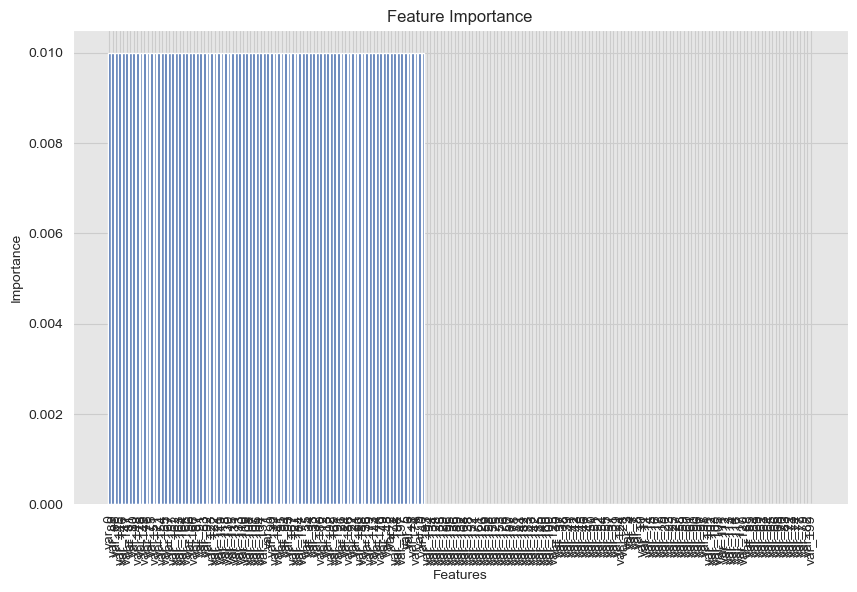

In [10]:
# Get the feature importance
importance = (abs(lr.coef_[0]) / np.abs(lr.coef_[0]).sum()).round(2)

feature_importance = get_feature_importance(
    features=X_train.columns, importance=importance)
print(feature_importance)

plt = get_feature_importance_plot(
    feature_importance, modelname='Logistic Regression')
plt.show()


### Learning Curves Plot

show the training error (Ein) and validation error (Eval) as a function of the training set size


In [11]:
X_train_temp = X_train.copy()

In [12]:
# loop over feature_importance and print out the features with importance > 0.1
for i in range(len(feature_importance)):
    if feature_importance['importance'][i] ==0:
        # remove the feature from the training data that has importance < 0.1
        X_train_temp = X_train_temp.drop(
            columns=feature_importance['feature'][i])
len(X_train_temp.columns)

90

In [13]:
lr = LogisticRegression(C=100, max_iter=10000)
lr.fit(X_train_temp, y_train)
cv_results = cross_validate(lr, X_train_temp, y_train, cv=NUM_FOLDS, scoring=[
                            'f1_macro', 'accuracy', 'f1_micro', 'f1_weighted'])

print('accuracy: ', cv_results['test_accuracy'].mean())
print('f1_macro: ', cv_results['test_f1_macro'].mean())
print('f1_micro: ', cv_results['test_f1_micro'].mean())


accuracy:  0.9119875000000001
f1_macro:  0.6463625886889967
f1_micro:  0.9119875000000001


    feature  importance
27   var_76        0.02
22   var_53        0.02
60  var_146        0.02
57  var_139        0.02
12   var_26        0.02
..      ...         ...
34   var_91        0.01
33   var_89        0.01
32   var_87        0.01
31   var_86        0.01
89  var_198        0.01

[90 rows x 2 columns]


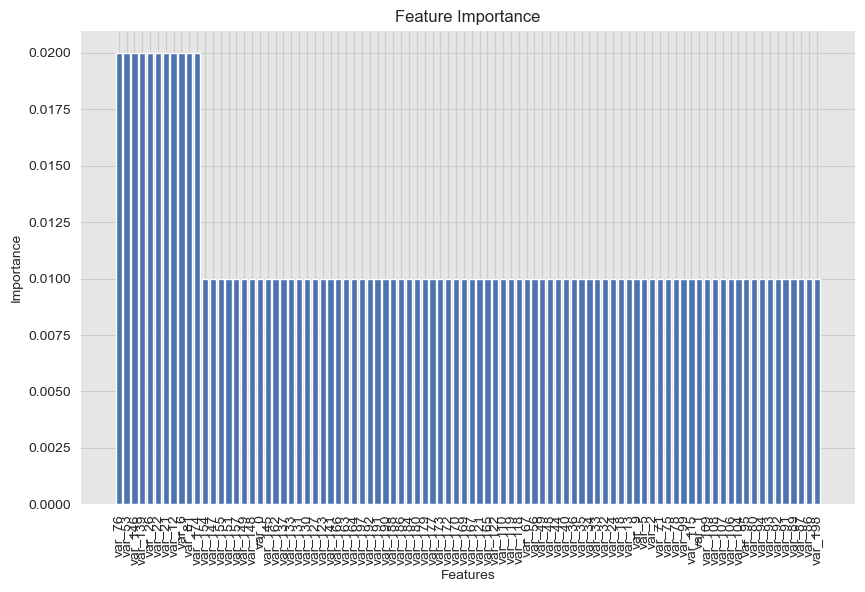

In [14]:
# Get the feature importance
importance = (abs(lr.coef_[0]) / np.abs(lr.coef_[0]).sum()).round(2)

feature_importance = get_feature_importance(
    features=X_train_temp.columns, importance=importance)
print(feature_importance)

plt = get_feature_importance_plot(
    feature_importance, modelname='Logistic Regression',save=False)
plt.show()


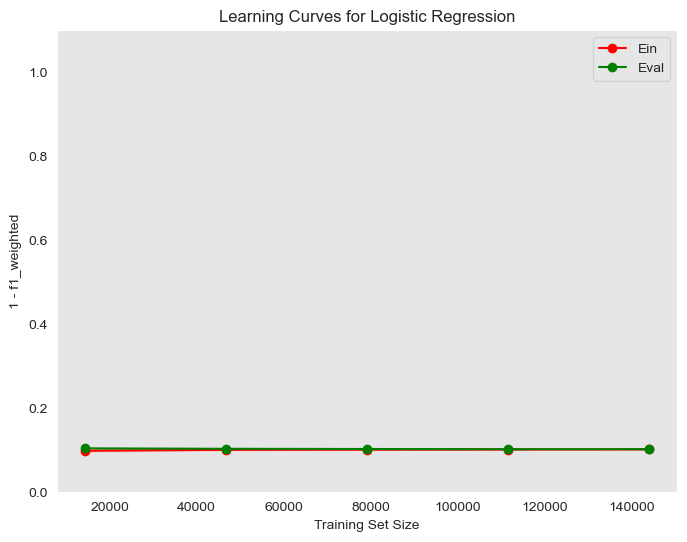

In [46]:
plt = get_learning_curve_plot(estimator=LogisticRegression(
    C=0.1, max_iter=10000, solver='saga'), X=X_train, y=y_train, cv=NUM_FOLDS, modelname='Logistic Regression')
plt.show()


In [ ]:
plt = get_learning_curve_plot(estimator=LogisticRegression(
    C=0.1, max_iter=10000, solver='saga'), X=X_train_temp, y=y_train, cv=NUM_FOLDS, modelname='Logistic Regression',save=False)
plt.show()


### Partial Dependence Plot

A partial dependence plot shows the relationship between a feature and the model's predictions while holding all other features constant. It can be used to understand the impact of a single feature on the model's predictions i.e. PDPs show the average effect on predictions as the value of feature changes.

From the plots, we may see the type of the relationship between a feature and a prediction. Some relationships may look linear whereas other are more complex.


In [ ]:
plt = get_partial_dependencies_plot(lr, X_train_temp, modelname='Logistic Regression', save=True)
# plt.show()


### Hyperparameter Tuning

This is a process of adjusting the parameters of a model to optimize its performance. It can be done using techniques like grid search, random search, or Bayesian optimization.


In [19]:
# Define the parameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}


### Grid Search


In [20]:
grid_search = get_grid_search(estimator=LogisticRegression(
    max_iter=10000), param_grid=param_grid, X=X_train, y=y_train, cv=NUM_FOLDS, scoring='f1_weighted')
# Print the results
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)
print("Test score with best parameters:", grid_search.score(X_test, y_test))


Best parameters found: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best score found: 0.8973298346690788
Test score with best parameters: 0.8953594884607815


### Heatmap


<module 'matplotlib.pyplot' from 'c:\\Users\\peter\\miniconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

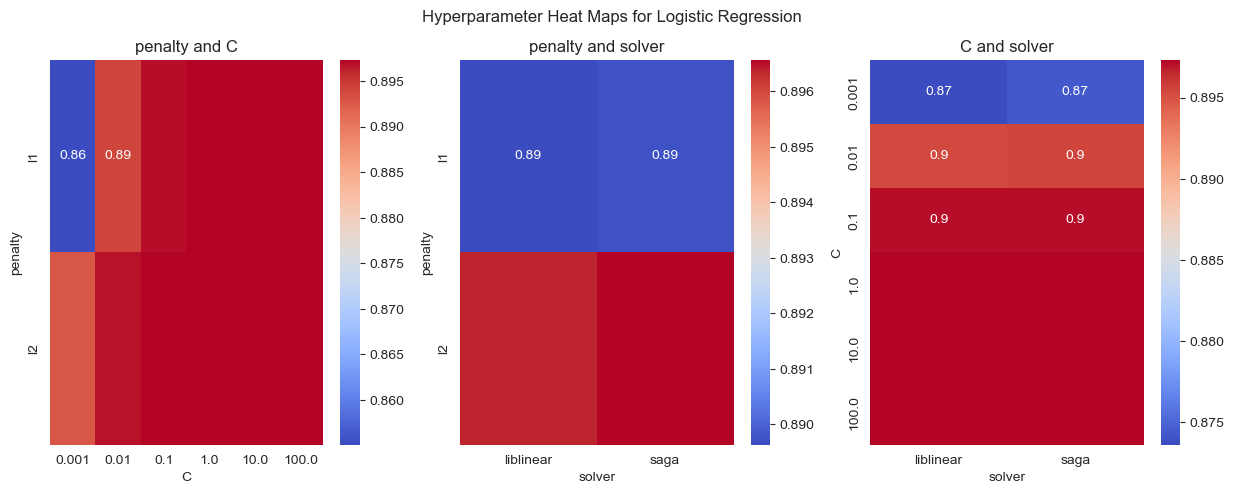

In [26]:
plot_hyper_param_heat_maps(param_grid, grid_search,modelname='Logistic Regression')


### Train-Validation Curve


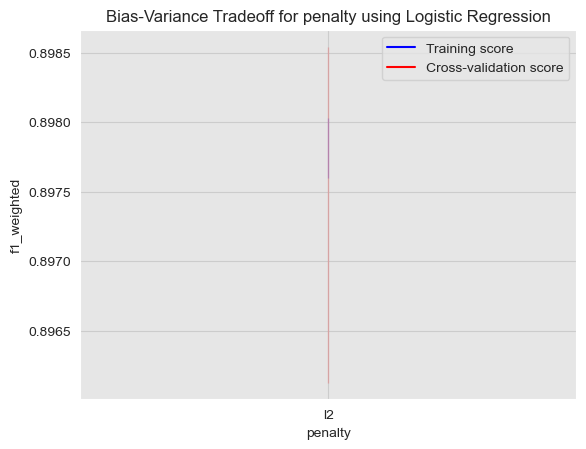

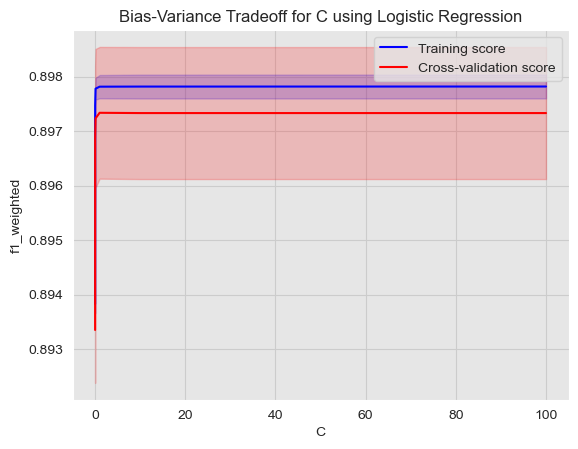

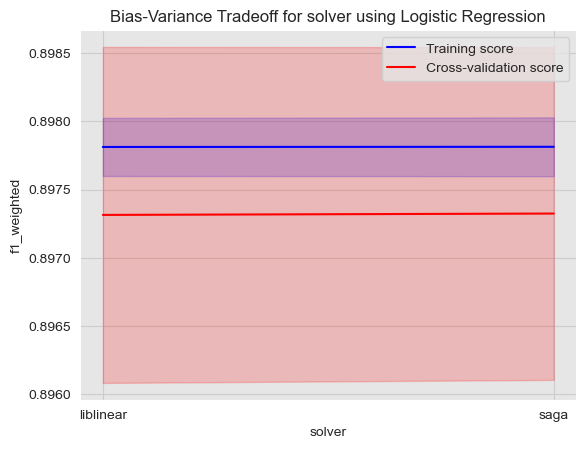

In [27]:
plot_hyper_param_train_validation_curve(estimator=LogisticRegression(
    max_iter=10000), param_grid=param_grid, X=X_train, y=y_train, cv=NUM_FOLDS, scoring='f1_weighted', modelname='Logistic Regression')


## Bias-Variance Analysis


In [28]:

lr = LogisticRegression(C=0.1, max_iter=10000, solver='saga')

mse, bias, var = get_bias_variance(
    lr, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


In [29]:
print("mse: ", mse)
print("bias: ", bias)
print("var: ", var)


mse:  0.08687175
bias:  0.08357837
var:  0.003293380000000001


### Decision Boundary Plot

This is plot shows the decision boundary of the model. It can help visualize how the model separates the classes in the dataset


Index(['var_0', 'var_1'], dtype='object')


c:\Users\bemoi\miniconda3\envs\v38_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\bemoi\miniconda3\envs\v38_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\bemoi\miniconda3\envs\v38_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


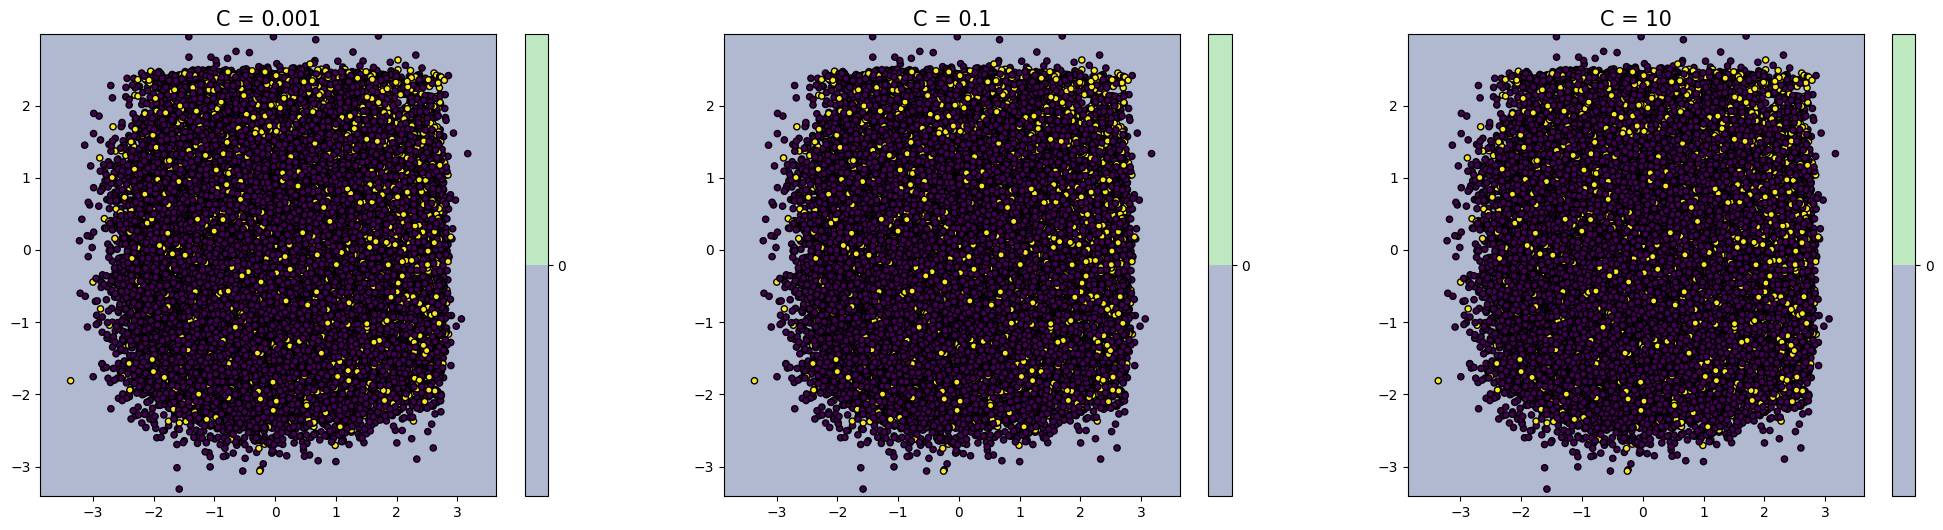

In [17]:
# reset style to default
plt.style.use('default')
# TODO: Fix this error
X_train_2vars = X_train[X_train.columns[0:2]]
print(X_train_2vars.columns)
plt = get_decision_regions(LogisticRegression(max_iter=10000, solver='saga'),
                              X_train_2vars, X_train_2vars[X_train.columns[0]], X_train_2vars[X_train.columns[1]], y_train, C=[0.001, 0.1, 10], modelname='Logistic Regression')
plt.show()
